In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/data
%ls # then you should see the data file

/content/drive/My Drive/data
data_biodiversity.csv  diabetes.csv   ROC.png
data.tif               occupancy.txt  training.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

In [ ]:
import skimage.io as io
img_ds = io.imread("data.tif")
img = np.array(img_ds, dtype='uint16')
img.shape

(544, 544, 63)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


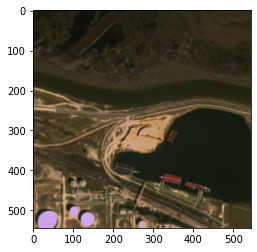

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:, [24,15,7]]/np.iinfo(img.dtype).max*20)

In [ ]:
data_csv=pd.read_csv('training.csv') 
data_csv_copy=data_csv.copy()
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19357 entries, 0 to 19356
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Band_1      19357 non-null  int64 
 1   Band_2      19357 non-null  int64 
 2   Band_3      19357 non-null  int64 
 3   Band_4      19357 non-null  int64 
 4   Band_5      19357 non-null  int64 
 5   Band_6      19357 non-null  int64 
 6   Band_7      19357 non-null  int64 
 7   Band_8      19357 non-null  int64 
 8   Band_9      19357 non-null  int64 
 9   Band_10     19357 non-null  int64 
 10  Band_11     19357 non-null  int64 
 11  Band_12     19357 non-null  int64 
 12  Band_13     19357 non-null  int64 
 13  Band_14     19357 non-null  int64 
 14  Band_15     19357 non-null  int64 
 15  Band_16     19357 non-null  int64 
 16  Band_17     19357 non-null  int64 
 17  Band_18     19357 non-null  int64 
 18  Band_19     19357 non-null  int64 
 19  Band_20     19357 non-null  int64 
 20  Band_2

In [ ]:
np.unique(data_csv['class'])

array([1, 2, 3, 4, 5, 6])

In [ ]:
np.unique(data_csv['classlabel'])

array(['Construction', 'Dock', 'Grass', 'Roof', 'Water', 'Wetland'],
      dtype=object)

In [ ]:
data_csv.head()

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,Band_11,Band_12,Band_13,Band_14,Band_15,Band_16,Band_17,Band_18,Band_19,Band_20,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30,Band_31,Band_32,Band_33,Band_34,Band_35,Band_36,Band_37,Band_38,Band_39,Band_40,Band_41,Band_42,Band_43,Band_44,Band_45,Band_46,Band_47,Band_48,Band_49,Band_50,Band_51,Band_52,Band_53,Band_54,Band_55,Band_56,Band_57,Band_58,Band_59,Band_60,Band_61,Band_62,Band_63,class,classlabel
0,293,349,383,444,454,495,541,586,613,649,691,730,752,782,818,854,896,939,981,1006,1057,1069,1111,1118,1134,1123,1139,1147,1173,1208,1215,1228,1230,1236,1258,1236,1256,1287,1300,1368,1325,1319,1307,1327,1351,1374,1381,1371,1399,1387,1388,1396,1374,1402,1467,1516,1658,2357,2301,2231,1906,1854,1881,1,Construction
1,406,462,500,538,558,627,694,741,780,829,884,935,970,1014,1072,1113,1157,1225,1275,1324,1384,1403,1451,1470,1475,1468,1477,1497,1532,1553,1566,1574,1574,1575,1583,1570,1588,1610,1626,1705,1650,1618,1632,1650,1670,1688,1678,1686,1687,1673,1673,1692,1639,1702,1728,1800,1935,2709,2476,2393,2110,2157,2170,1,Construction
2,726,713,763,803,845,926,1010,1096,1149,1207,1286,1359,1428,1491,1572,1644,1738,1850,1946,2036,2136,2181,2242,2310,2333,2350,2374,2403,2453,2514,2541,2561,2553,2520,2547,2469,2505,2510,2530,2561,2514,2480,2461,2464,2516,2447,2460,2434,2411,2396,2390,2353,2305,2314,2361,2407,2491,2951,3078,2830,2579,2552,2647,1,Construction
3,720,765,829,877,923,1028,1126,1209,1273,1332,1422,1501,1568,1652,1748,1837,1935,2066,2162,2221,2186,2275,2240,2356,2550,2687,2744,2778,2833,2911,2949,2990,2976,2963,2983,2899,2945,2959,2979,2997,2947,2907,2900,2919,2959,2882,2879,2855,2861,2811,2810,2769,2712,2728,2750,2754,2929,3361,3287,3100,2960,3052,2980,1,Construction
4,710,804,881,919,967,1090,1190,1259,1324,1394,1481,1569,1648,1732,1823,1928,2030,2064,2154,2216,2182,2273,2235,2354,2549,2819,2875,3005,3078,3165,3216,3282,3307,3281,3318,3254,3283,3309,3334,3368,3335,3297,3286,3278,3353,3258,3284,3255,3248,3176,3183,3138,3103,3090,3103,3152,3280,3659,3551,3522,3327,3321,3374,1,Construction


In [ ]:
data_csv.describe()

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,Band_11,Band_12,Band_13,Band_14,Band_15,Band_16,Band_17,Band_18,Band_19,Band_20,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30,Band_31,Band_32,Band_33,Band_34,Band_35,Band_36,Band_37,Band_38,Band_39,Band_40,Band_41,Band_42,Band_43,Band_44,Band_45,Band_46,Band_47,Band_48,Band_49,Band_50,Band_51,Band_52,Band_53,Band_54,Band_55,Band_56,Band_57,Band_58,Band_59,Band_60,Band_61,Band_62,Band_63,class
count,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.00000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000
mean,141.041535,269.595340,363.131012,424.842796,450.018960,493.724751,523.165418,552.706824,564.674795,582.42176,614.208090,638.633621,658.350881,692.268275,721.306866,748.099344,772.907320,796.212688,815.872759,823.734411,827.011469,831.609960,833.890686,847.647053,872.450380,908.972155,924.913778,949.611562,970.514698,976.816294,1004.477605,1101.690396,1177.753578,1256.023041,1363.707444,1428.173891,1512.955675,1553.508447,1596.452911,1654.849408,1664.017461,1669.984037,1691.133750,1719.144444,1763.624115,1764.870796,1777.434571,1793.589657,1810.386217,1815.954073,1837.724131,1852.634551,1850.864752,1847.531177,1901.408948,1952.002325,1998.527768,2215.647518,2245.883763,2246.117580,2184.166400,2177.650152,2242.622204,4.350261
std,731.819759,757.762277,700.486580,647.621751,636.706727,682.586021,675.017890,654.910077,607.652320,587.91301,602.198386,604.863361,572.040595,562.040596,528.130221,524.298890,524.578871,531.426555,559.156106,582.294280,572.736406,612.159578,609.913086,652.314794,716.064929,805.086959,827.779813,901.102078,961.335133,991.852687,1052.690716,1219.770476,1231.738548,1232.743484,1346.866864,1389.030466,1403.063342,1383.433647,1415.523200,1482.780879,1481.187398,1482.969784,1496.818298,1514.247552,1547.128165,1539.572404,1552.017441,1564.478821,1571.069809,1566.944901,1577.555131,1583.143539,1571.821904,1538.723554,1560.537445,1569.998892,1577.510412,1380.965286,1461.337250,1478.643517,1551.562914,1595.657155,1650.479128,1.729532
min,-270.000000,-102.000000,31.000000,113.000000,145.000000,161.000000,166.000000,184.000000,194.000000,201.00000,217.000000,228.000000,243.000000,262.000000,285.000000,315.000000,335.000000,343.000000,336.000000,314.000000,308.000000,286.000000,270.000000,260.000000,254.000000,247.000000,243.000000,235.000000,226.000000,219.000000,218.000000,214.000000,209.000000,198.000000,189.000000,176.000000,176.000000,179.000000,178.000000,185.000000,183.000000,177.000000,181.000000,182.000000,184.000000,185.000000,182.000000,181.000000,175.000000,183.000000,192.000000,195.000000,191.000000,203.000000,233.000000,257.000000,287.000000,475.000000,408.000000,438.000000,404.000000,391.000000,390.000000,1.000000
25%,-142.000000,-15.000000,93.000000,164.000000,184.000000,200.000000,213.000000,236.000000,252.000000,270.00000,293.000000,312.000000,341.000000,380.000000,420.000000,450.000000,478.000000,504.000000,518.000000,519.000000,520.000000,488.000000,466.000000,450.000000,439.000000,430.000000,431.000000,418.000000,390.000000,357.000000,349.000000,378.000000,396.000000,367.000000,320.000000,264.000000,242.000000,242.000000,246.000000,283.000000,255.000000,253.000000,256.000000,26

In [ ]:
X=data_csv.drop(["class","classlabel"],axis=1)
y=data_csv["class"]

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# normalize the input features and split the data into training and test datasets
X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

# perform logistic regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

# predict the test dataset
y_pred_test = logreg.predict(X_test) # classification labels for test data

print(y_pred_test)
y_pred1 = logreg.predict_proba(X_test)[:, 1] # classification probability for class = 1

# # predict the training dataset - check the accuracy for both training and test datasets in order to evaluate the underfitting or overfitting of the classifer
y_pred_train = logreg.predict(X_train)

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(X_test, y_test)))

[3 5 3 ... 6 2 3]
Test accuracy score: 0.9985
Training accuracy score: 0.9975
Training score: 0.9975
Test score: 0.9985


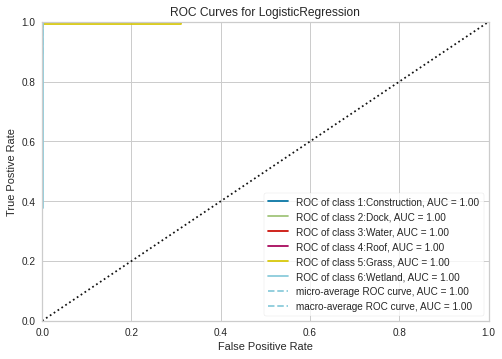

In [ ]:
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def roc_plot(model):
    X_norm=preprocessing.scale(X) 
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=10)
    roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['1:Construction','2:Dock','3:Water','4:Roof','5:Grass','6:Wetland'])
    return 
model= LogisticRegression(max_iter=500)
roc_plot(model)

The confusion matrix: [[ 581    0    0    0    2    1]
 [   0   75    0    0    0    0]
 [   0    0 1714    0    0    0]
 [   0    0    0  214    0    0]
 [   0    0    0    0  699    6]
 [   0    0    0    0    0 2516]]
The classification accuracy: 0.9985
The classification error: 0.0015
The Kappa score: 0.9978
                precision    recall  f1-score   support

1:Construction       1.00      0.99      1.00       584
        2:Dock       1.00      1.00      1.00        75
       3:Water       1.00      1.00      1.00      1714
        4:Roof       1.00      1.00      1.00       214
       5:Grass       1.00      0.99      0.99       705
     6:Wetland       1.00      1.00      1.00      2516

      accuracy                           1.00      5808
     macro avg       1.00      1.00      1.00      5808
  weighted avg       1.00      1.00      1.00      5808



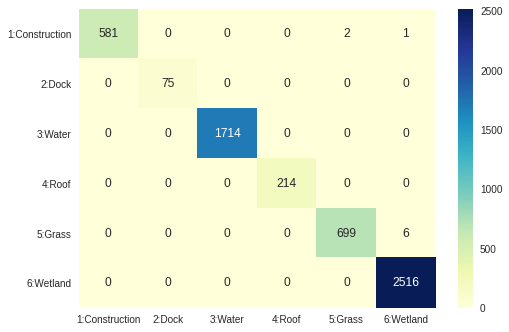

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def accuracy(y_test, y_pred):

    con = confusion_matrix(y_test, y_pred)
    print('The confusion matrix:',con)
    cm_matrix = pd.DataFrame(data=con, columns=['1:Construction','2:Dock','3:Water','4:Roof','5:Grass','6:Wetland'], 
                                       index=['1:Construction','2:Dock','3:Water','4:Roof','5:Grass','6:Wetland'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
  
    print('The classification accuracy: {0:0.4f}'. format((y_test == y_pred).sum() / float(len(y_test))))
    print('The classification error: {0:0.4f}'. format((y_test != y_pred).sum() / float(len(y_test))))
    print('The Kappa score: {0:0.4f}'. format(sklearn.metrics.cohen_kappa_score(y_test, y_pred)))
    #print('The precision score: {0:0.4f}'. format(sklearn.metrics.precision_score(y_test, y_pred,average=None)))
    #print('The recall score: {0:0.4f}'. format(sklearn.metrics.recall_score(y_test, y_pred, average=None))
    #print('The F1 score: {}'. format(sklearn.metrics.f1_score(y_test, y_pred, average=None)))
    target_names = ['1:Construction','2:Dock','3:Water','4:Roof','5:Grass','6:Wetland']
    print(sklearn.metrics.classification_report(y_test, y_pred, target_names=target_names))
    return 

y_pred = y_pred_test
accuracy(y_test, y_pred_test)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# normalize the input features and split the data into training and test datasets
X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True)
# build KNN classifier 
knn = KNeighborsClassifier(n_neighbors=10) # k = 10, try different values
knn.fit(X_train, y_train)

# predict the test dataset
y_pred = knn.predict(X_test) # classification labels for test data
y_pred1 = knn.predict_proba(X_test)[:, 1] # classification probability for class = 1

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9982
Test set score: 0.9974


3


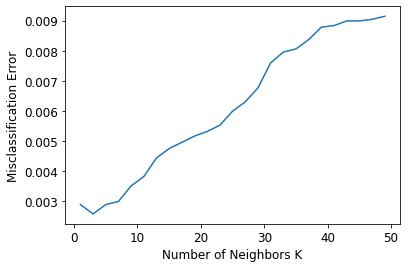

In [ ]:
'''
code reference: https://medium.com/datadriveninvestor/k-fold-cross-validation-for-parameter-tuning-75b6cb3214f
'''
from sklearn.model_selection import cross_val_score


#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,50) if x % 2 != 0]

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_norm, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#classification error
MSE = [1-x for x in cv_scores]

#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
# update k 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9990
Test set score: 0.9983


The confusion matrix: [[ 581    0    0    0    2    1]
 [   0   75    0    0    0    0]
 [   0    0 1714    0    0    0]
 [   0    0    0  214    0    0]
 [   0    0    0    0  698    7]
 [   0    0    0    0    0 2516]]
The classification accuracy: 0.9983
The classification error: 0.0017
The Kappa score: 0.9975
                precision    recall  f1-score   support

1:Construction       1.00      0.99      1.00       584
        2:Dock       1.00      1.00      1.00        75
       3:Water       1.00      1.00      1.00      1714
        4:Roof       1.00      1.00      1.00       214
       5:Grass       1.00      0.99      0.99       705
     6:Wetland       1.00      1.00      1.00      2516

      accuracy                           1.00      5808
     macro avg       1.00      1.00      1.00      5808
  weighted avg       1.00      1.00      1.00      5808



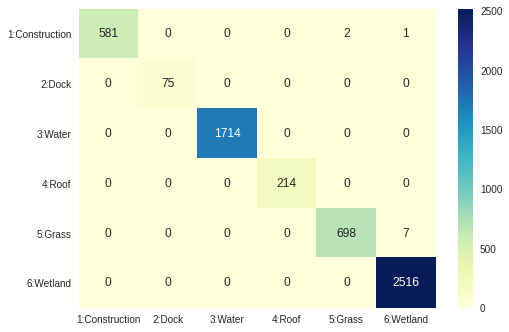

In [ ]:
accuracy(y_test, y_pred)

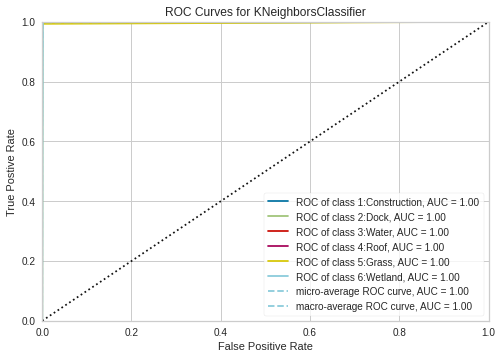

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
roc_plot(model)

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
dtree = DecisionTreeClassifier() # Decision tree classifier
dtree.fit(X_train, y_train)      # Use fit method on the train data

y_pred = dtree.predict(X_test)   # Predict the target class of test data
accuracy_score(y_test, y_pred) # Measure Accuracy

0.9982782369146006

In [ ]:
scores = cross_val_score(dtree, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [ ]:
param_grid = {'criterion':['gini','entropy'], 'max_depth' :[3,5,7,20],'min_samples_leaf': range(1,10)}
grid_search = GridSearchCV(dtree,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
grid_search.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_lea

In [ ]:
import pandas as pd
df = pd.DataFrame(grid_search.cv_results_['params'])
l = []
for i in df["criterion"]:
  if i == 'entropy':
    l.append(i)
print(len(l))
df

36


,criterion,max_depth,min_samples_leaf
0,gini,3,1
1,gini,3,2
2,gini,3,3
3,gini,3,4
4,gini,3,5
...,...,...,...
67,entropy,20,5
68,entropy,20,6
69,entropy,20,7
70,entropy,20,8


In [ ]:
gini = df[0:36]
entropy = df[36:72]

In [ ]:
df2 = pd.DataFrame(grid_search.cv_results_['mean_test_score'])
gini_test = df2[0:36]
entropy_test = df2[36:72]

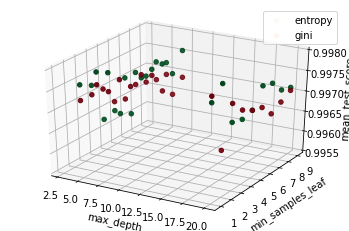

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0.9955, 0.9980)
ax.scatter3D(entropy['max_depth'], entropy['min_samples_leaf'],entropy_test, c=entropy_test,cmap= 'Greens', label='entropy')
ax.scatter3D(gini['max_depth'], gini['min_samples_leaf'],gini_test,c=gini_test,cmap= 'Reds',label='gini')
ax.set_xlabel('max_depth')
ax.set_ylabel('min_samples_leaf')
ax.set_zlabel('mean_test_score')
ax.legend()
plt.show()

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_gs = grid_search.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.9982782369146006

The confusion matrix: [[ 582    2    0    0    1    4]
 [   0   82    0    0    0    0]
 [   0    0 1732    0    0    0]
 [   0    0    0  223    0    0]
 [   0    0    0    0  668    0]
 [   0    0    0    0    3 2511]]
The classification accuracy: 0.9983
The classification error: 0.0017
The Kappa score: 0.9975
                precision    recall  f1-score   support

1:Construction       1.00      0.99      0.99       589
        2:Dock       0.98      1.00      0.99        82
       3:Water       1.00      1.00      1.00      1732
        4:Roof       1.00      1.00      1.00       223
       5:Grass       0.99      1.00      1.00       668
     6:Wetland       1.00      1.00      1.00      2514

      accuracy                           1.00      5808
     macro avg       0.99      1.00      1.00      5808
  weighted avg       1.00      1.00      1.00      5808



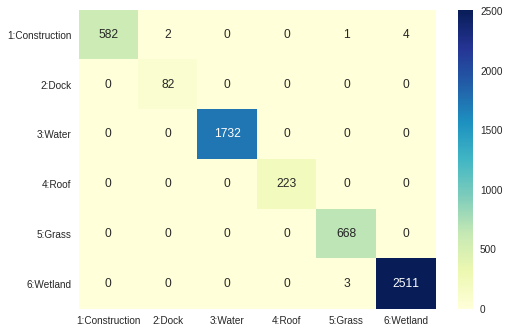

In [ ]:
accuracy(y_test, y_pred_gs)

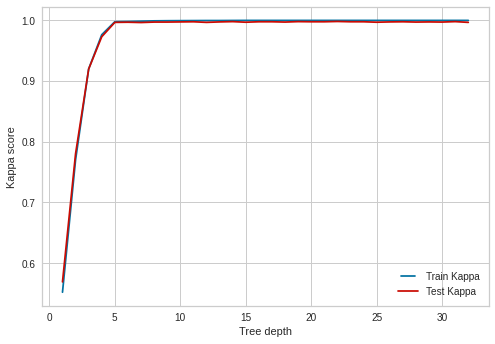

In [ ]:
from sklearn.metrics import cohen_kappa_score

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
  
   dt = DecisionTreeClassifier(max_depth=max_depth)
  # training 
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   kappa_train = cohen_kappa_score(y_train, train_pred)
   train_results.append(kappa_train)

  # testing
   test_pred = dt.predict(X_test)
   kappa_test = cohen_kappa_score(y_test, test_pred)
   test_results.append(kappa_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Kappa')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Kappa score')
plt.xlabel('Tree depth')
plt.show()

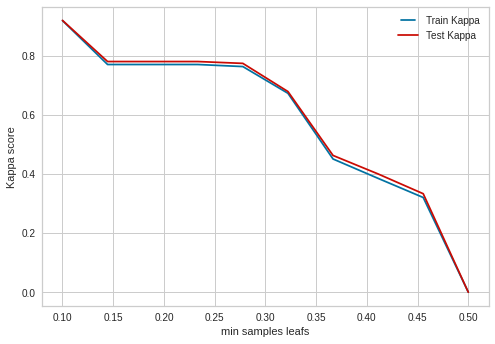

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
  # training 
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   kappa_train = cohen_kappa_score(y_train, train_pred)
   train_results.append(kappa_train)

  # testin 
   test_pred = dt.predict(X_test)
   kappa_test = cohen_kappa_score(y_test, test_pred)
   test_results.append(kappa_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Kappa')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Kappa score')
plt.xlabel('min samples leafs')
plt.show()

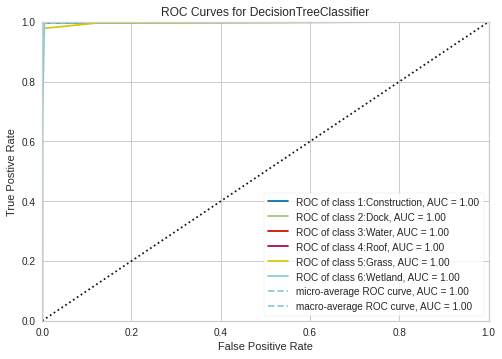

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
roc_plot(model)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
rf = RandomForestClassifier() # Decision tree classifier
rf.fit(X_train, y_train)      # Use fit method on the train data

y_pred = rf.predict(X_test)   # Predict the target class of test data
accuracy_score(y_test, y_pred) # Measure Accuracy

0.9993112947658402

In [ ]:
forest_params = {'max_depth': range(4, 20),
                 'max_features': ['auto','log2'],'min_samples_leaf': range(3,10)}

forest_grid = GridSearchCV(estimator=rf, param_grid=forest_params, cv=10,n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

# select the best hyperparameters
best_params = forest_grid.best_params_

# use the selected hyperparameters to define a random forest estimator
best_forest = RandomForestClassifier (n_estimators=100, n_jobs=-1, 
                                      max_features=best_params['max_features'], 
                                      max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'],
                                      random_state=42)

best_forest.fit(X_train, y_train)

print (forest_grid.best_params_, forest_grid.best_score_)

Fitting 10 folds for each of 224 candidates, totalling 2240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 2240 out of 2240 | elapsed: 67.0min finished


{'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 3} 0.9983760567295482


In [ ]:
y_pred=best_forest.predict(X_test)

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Training set score: {:.4f}'.format(best_forest.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_forest.score(X_test, y_test)))

Training set score: 0.9992
Test set score: 0.9990


The confusion matrix: [[ 587    0    0    0    2    0]
 [   0   82    0    0    0    0]
 [   0    0 1732    0    0    0]
 [   0    0    0  223    0    0]
 [   0    0    0    0  664    4]
 [   0    0    0    0    0 2514]]
The classification accuracy: 0.9990
The classification error: 0.0010
The Kappa score: 0.9985
                precision    recall  f1-score   support

1:Construction       1.00      1.00      1.00       589
        2:Dock       1.00      1.00      1.00        82
       3:Water       1.00      1.00      1.00      1732
        4:Roof       1.00      1.00      1.00       223
       5:Grass       1.00      0.99      1.00       668
     6:Wetland       1.00      1.00      1.00      2514

      accuracy                           1.00      5808
     macro avg       1.00      1.00      1.00      5808
  weighted avg       1.00      1.00      1.00      5808



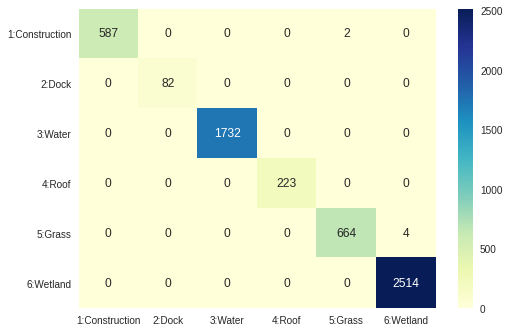

In [ ]:
accuracy(y_test, y_pred)

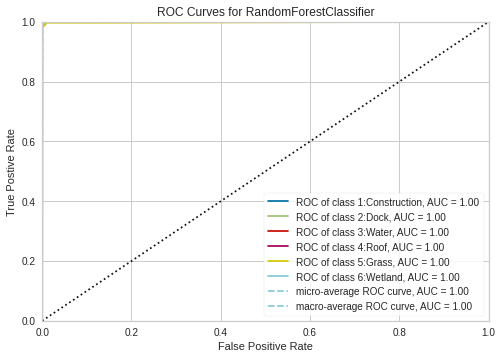

In [ ]:
model = RandomForestClassifier (n_estimators=100, n_jobs=-1, 
                                      max_features='auto', 
                                      max_depth= 18, min_samples_leaf=3,
                                      random_state=42)
roc_plot(model)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# normalize the input features and split the data into training and test datasets
X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

gnb=GaussianNB(var_smoothing=1e-02)
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
y_pred1 = gnb.predict_proba(X_test)[:, 1]

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9304
Test set score: 0.9327


The confusion matrix: [[ 522   35    0    0    0    3]
 [   0   89    0    0    0    0]
 [   0    0 1762    0    0    0]
 [   3    0    0  210    0    0]
 [   0    8    0    0  629   12]
 [   0    0   21    0  309 2205]]
The classification accuracy: 0.9327
The classification error: 0.0673
The Kappa score: 0.9054
                precision    recall  f1-score   support

1:Construction       0.99      0.93      0.96       560
        2:Dock       0.67      1.00      0.81        89
       3:Water       0.99      1.00      0.99      1762
        4:Roof       1.00      0.99      0.99       213
       5:Grass       0.67      0.97      0.79       649
     6:Wetland       0.99      0.87      0.93      2535

      accuracy                           0.93      5808
     macro avg       0.89      0.96      0.91      5808
  weighted avg       0.95      0.93      0.94      5808



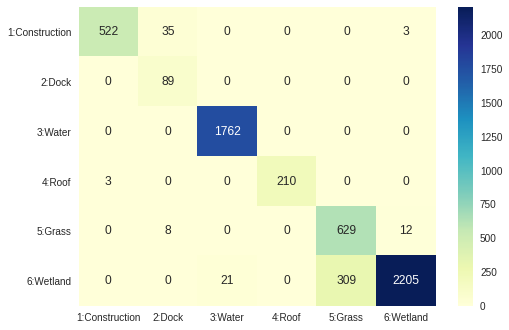

In [ ]:
accuracy(y_test, y_pred )

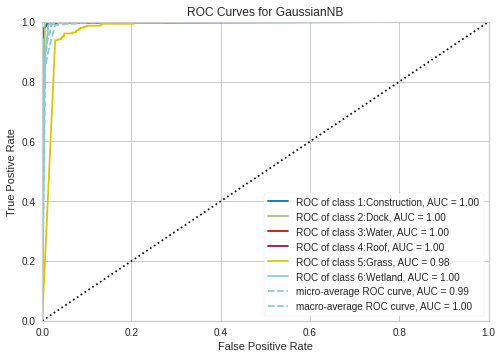

In [ ]:
roc_plot(gnb)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# normalize the input features and split the data into training and test datasets
X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)



*   Linear Kernel 






Training set score: 0.9987
Test set score: 0.9985
The confusion matrix: [[ 560    0    0    0    0    0]
 [   0   89    0    0    0    0]
 [   0    0 1762    0    0    0]
 [   0    0    0  213    0    0]
 [   0    0    0    0  640    9]
 [   0    0    0    0    0 2535]]
The classification accuracy: 0.9985
The classification error: 0.0015
The Kappa score: 0.9978
                precision    recall  f1-score   support

1:Construction       1.00      1.00      1.00       560
        2:Dock       1.00      1.00      1.00        89
       3:Water       1.00      1.00      1.00      1762
        4:Roof       1.00      1.00      1.00       213
       5:Grass       1.00      0.99      0.99       649
     6:Wetland       1.00      1.00      1.00      2535

      accuracy                           1.00      5808
     macro avg       1.00      1.00      1.00      5808
  weighted avg       1.00      1.00      1.00      5808

None


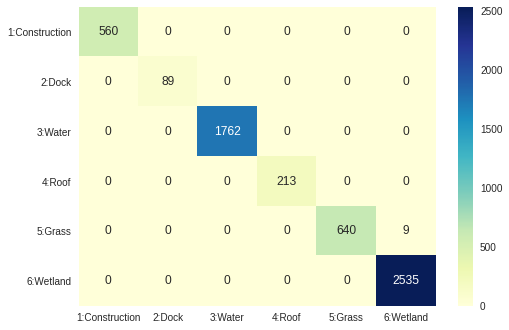

In [ ]:
# linear kernel

linear_svc=SVC(kernel='linear', C=1.0, probability=True) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=linear_svc.predict(X_test)
y_pred1=linear_svc.predict_proba(X_test)[:,1]

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))
print(accuracy(y_test, y_pred))

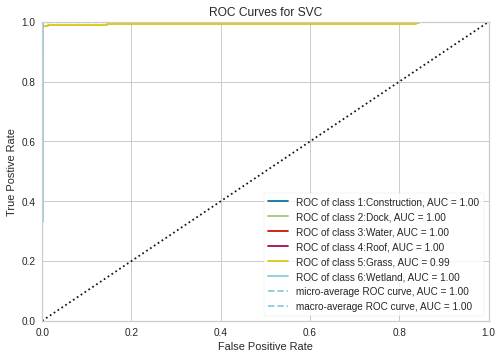

In [ ]:
roc_plot(linear_svc)



*    Polynomial Kernel




Training set score: 0.9283
Test set score: 0.9296
The confusion matrix: [[ 552    0    0    0    0    8]
 [   0   85    0    0    0    4]
 [   0    0 1762    0    0    0]
 [   0    0    0  213    0    0]
 [   0    0    0    0  259  390]
 [   0    0    7    0    0 2528]]
The classification accuracy: 0.9296
The classification error: 0.0704
The Kappa score: 0.8952
                precision    recall  f1-score   support

1:Construction       1.00      0.99      0.99       560
        2:Dock       1.00      0.96      0.98        89
       3:Water       1.00      1.00      1.00      1762
        4:Roof       1.00      1.00      1.00       213
       5:Grass       1.00      0.40      0.57       649
     6:Wetland       0.86      1.00      0.93      2535

      accuracy                           0.93      5808
     macro avg       0.98      0.89      0.91      5808
  weighted avg       0.94      0.93      0.92      5808

None


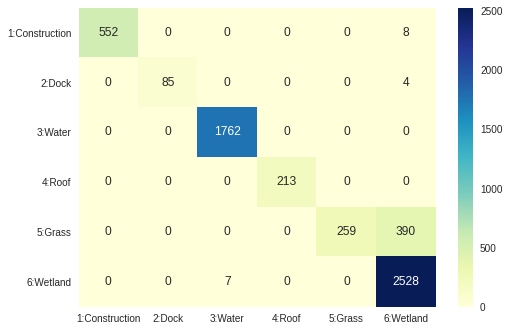

In [ ]:
# polynomial kernel

poly_svc=SVC(kernel='poly', C=1.0, probability=True) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)
y_pred1=poly_svc.predict_proba(X_test)[:,1]

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Training set score: {:.4f}'.format(poly_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(poly_svc.score(X_test, y_test)))
print(accuracy(y_test, y_pred))

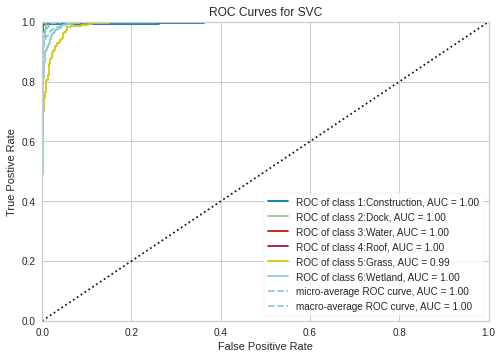

In [ ]:
roc_plot(poly_svc)



*   Sigmoid Kernel



Training set score: 0.8773
Test set score: 0.8843
The confusion matrix: [[ 301    0    0  142  114    3]
 [  11    2    0   75    1    0]
 [   0    0 1762    0    0    0]
 [ 108    0    0   21   84    0]
 [   0    0    0   88  522   39]
 [   0    0    7    0    0 2528]]
The classification accuracy: 0.8843
The classification error: 0.1157
The Kappa score: 0.8327
                precision    recall  f1-score   support

1:Construction       0.72      0.54      0.61       560
        2:Dock       1.00      0.02      0.04        89
       3:Water       1.00      1.00      1.00      1762
        4:Roof       0.06      0.10      0.08       213
       5:Grass       0.72      0.80      0.76       649
     6:Wetland       0.98      1.00      0.99      2535

      accuracy                           0.88      5808
     macro avg       0.75      0.58      0.58      5808
  weighted avg       0.90      0.88      0.88      5808

None


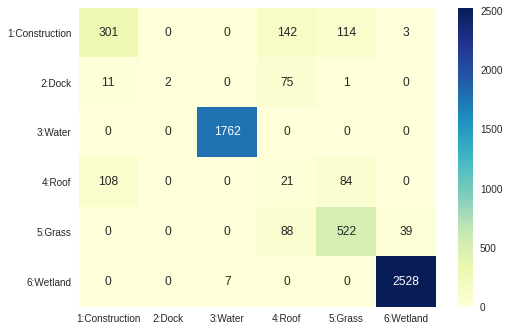

In [ ]:
# sigmoid kernel

sigmoid_svc=SVC(kernel='sigmoid', C=1.0, probability=True) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
y_pred1=sigmoid_svc.predict_proba(X_test)[:,1]

# print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
print('Training set score: {:.4f}'.format(sigmoid_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(sigmoid_svc.score(X_test, y_test)))
print(accuracy(y_test, y_pred))

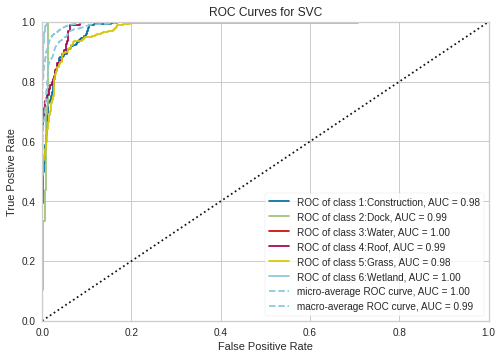

In [ ]:
roc_plot(sigmoid_svc)



*   rbf kernal




In [ ]:
# rbf kernel
# The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
# For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly.
# A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 

test_score = []
for c in range(10,26):
  rbf_svc=SVC(kernel='rbf', C=c) 

# fit classifier to training set
  rbf_svc.fit(X_train,y_train)

  # make predictions on test set
  y_pred=rbf_svc.predict(X_test)
  y_pred1=sigmoid_svc.predict_proba(X_test)[:,1]
  print('c =',c)
  # print the scores on training and test set in order to evaluate the underfitting or overfitting of the classifer
  print('Training set score: {:.4f}'.format(rbf_svc.score(X_train, y_train)))
  print('Test set score: {:.4f}'.format(rbf_svc.score(X_test, y_test)))
  test_score.append(rbf_svc.score(X_test, y_test))

print(max(test_score))

c = 10
Training set score: 0.9986
Test set score: 0.9981
c = 11
Training set score: 0.9986
Test set score: 0.9981
c = 12
Training set score: 0.9987
Test set score: 0.9983
c = 13
Training set score: 0.9987
Test set score: 0.9983
c = 14
Training set score: 0.9987
Test set score: 0.9983
c = 15
Training set score: 0.9988
Test set score: 0.9983
c = 16
Training set score: 0.9988
Test set score: 0.9983
c = 17
Training set score: 0.9988
Test set score: 0.9983
c = 18
Training set score: 0.9988
Test set score: 0.9985
c = 19
Training set score: 0.9988
Test set score: 0.9985
c = 20
Training set score: 0.9988
Test set score: 0.9985
c = 21
Training set score: 0.9988
Test set score: 0.9985
c = 22
Training set score: 0.9988
Test set score: 0.9985
c = 23
Training set score: 0.9988
Test set score: 0.9985
c = 24
Training set score: 0.9988
Test set score: 0.9985
c = 25
Training set score: 0.9990
Test set score: 0.9985
0.9984504132231405


The confusion matrix: [[ 560    0    0    0    0    0]
 [   0   89    0    0    0    0]
 [   0    0 1762    0    0    0]
 [   0    0    0  213    0    0]
 [   0    0    0    0  640    9]
 [   0    0    0    0    0 2535]]
The classification accuracy: 0.9985
The classification error: 0.0015
The Kappa score: 0.9978
                precision    recall  f1-score   support

1:Construction       1.00      1.00      1.00       560
        2:Dock       1.00      1.00      1.00        89
       3:Water       1.00      1.00      1.00      1762
        4:Roof       1.00      1.00      1.00       213
       5:Grass       1.00      0.99      0.99       649
     6:Wetland       1.00      1.00      1.00      2535

      accuracy                           1.00      5808
     macro avg       1.00      1.00      1.00      5808
  weighted avg       1.00      1.00      1.00      5808



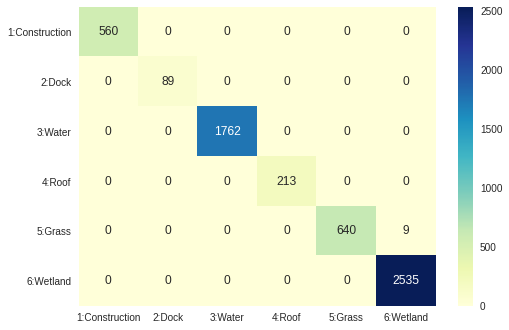

In [ ]:
rbf_svc=SVC(kernel='rbf', C=25.0) 

# fit classifier to training set
rbf_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=rbf_svc.predict(X_test)
accuracy(y_test, y_pred)

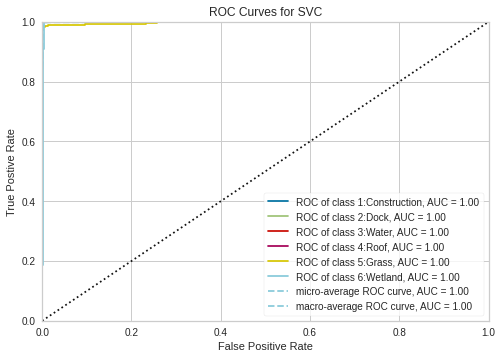

In [ ]:
model = SVC(kernel='rbf', C=25.0) 
roc_plot(model)